„Ç≥„É©„Éú„Å∏„ÅÆ„É™„É≥„ÇØ

https://colab.research.google.com/drive/1wyZ_8mxRvrkftzwg2_bep8urj1TdI8A-?usp=sharing

# „ÅØ„Åò„ÇÅ„Å´

GAN(DCGAN)„ÇíÁî®„ÅÑ„Å¶„Ç¢„Éã„É°„Ç≠„É£„É©„ÇØ„Çø„Éº„ÅÆÈ°îÁîüÊàê„ÇíË°å„ÅÜ„ÄÇ14397Êûö„ÅÆ„Ç¢„Éã„É°„Ç≠„É£„É©„ÇØ„Çø„Éº„ÅÆÈ°îÁîªÂÉè„Çí‰ΩøÁî®„Åó„Å¶GAN„ÅÆË®ìÁ∑¥„ÇíË°å„ÅÜ„ÄÇ

„É¢„Éá„É´„ÅØDCGAN„Çí‰ΩøÁî®„Åô„Çã„ÄÇ


1. TPU+TFRecord„Çí‰ΩøÁî®„Åó„Å¶ÁîªÂÉè„ÇíÈ´òÈÄü„Å´Â≠¶Áøí„Åï„Åõ„Çã.


### ÂâçÊ∫ñÂÇô

GCS„ÅÆ„Ç¢„ÇØ„Çª„Çπ„Ç≠„Éº„Å™„Å©„ÅÆ„Éë„É©„É°„Éº„Çø„ÇíÂèó„ÅëÂèñ„Çã„Åü„ÇÅHydra„Çí‰ΩøÁî®.

In [ ]:
!pip install hydra-core --upgrade #hydra„Çí„Ç§„É≥„Çπ„Éà„Éº„É´

### import

In [2]:
import gdown #google drive„ÉÄ„Ç¶„É≥„É≠„Éº„ÉâÁî®
from glob import glob #„Éï„Ç°„Ç§„É´ÂêçÂèñÂæó

#„Åù„ÅÆ‰ªñÊ±éÁî®„É©„Ç§„Éñ„É©„É™
import math 
import matplotlib.pyplot as plt
from hydra import initialize, compose
import os
import time 
import seaborn as sns


#Ê©üÊ¢∞Â≠¶ÁøíÁî®„É©„Ç§„Éñ„É©„É™
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import History #History„Ç≥„Éº„É´„Éê„ÉÉ„ÇØÁî®

AUTOTUNE = tf.data.AUTOTUNE #‰∏¶ÂàóÂåñÁî®

### TPU

È´òÈÄüÂåñ„ÅÆ„Åü„ÇÅ„Å´TPU„Çí‰ΩøÁî®„Åô„Çã„ÄÇ

In [3]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.69.216.34:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.69.216.34:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [4]:
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


### Â§âÊï∞ÂÆ£Ë®Ä

‰∫ãÂâç„Å´Â§âÊï∞„ÇíÂÆ£Ë®Ä„Åó„Å¶„Åä„ÅÑ„Å¶„ÅÆ‰∏Ä„Å§„ÅÆ„Ç≥„É©„É†„ÅßÂÆüË°å„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„Çã„ÄÇ

In [5]:
#Hydra„Éï„Ç°„Ç§„É´Ë™≠„ÅøËæº„Åø
config_path = "./drive/MyDrive/data/imouto_face/config"
with initialize(version_base=None, config_path= config_path):
    cfg = compose(config_name="variable.yaml")

In [6]:
SHARDS = 16 #ÂàÜÂâ≤Êï∞
TARGET_SIZE = (64,64) #„Çµ„Ç§„Ç∫
file_paths = [] #ÁîªÂÉè„Éë„Çπ
nb_images = 14397 #ÁîªÂÉèÊï∞
shard_size = 900 #ÂàÜÂâ≤ÁîªÂÉèÊï∞
GCS_OUTPUT = cfg.gcs.gcs_output #GCS„ÅÆOUTPUTPATH
BATCH_SIZE = 128 #„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫
latent_dim = 100 #ÊΩúÂú®Á©∫Èñì

In [7]:
#GCS„Å∏„Ç¢„ÇØ„Çª„Çπ„Åô„Çã„Åü„ÇÅ„ÅÆ„Éë„Çπ„ÇíÈÄö„Åô
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=cfg.gcs.token_path

In [8]:
#ÁîªÂÉèË°®Á§∫Èñ¢Êï∞
def display_9_images_from_dataset(dataset):
  plt.figure(figsize=(13,13))
  subplot=331
  for i, image  in enumerate(dataset):
    image /= 255
    plt.subplot(subplot)
    plt.axis('off')
    plt.imshow(image.numpy())
    subplot += 1
    if i==8:
      break
  plt.tight_layout()
  plt.subplots_adjust(wspace=0.1, hspace=0.1)
  plt.show()

## ÂâçÂá¶ÁêÜ

„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÇíÂâçÂá¶ÁêÜ„ÅóË®ìÁ∑¥„ÇíË°å„ÅÑ„ÇÑ„Åô„Åè„Åô„Çã

1. „Éá„Éº„Çø„Çª„ÉÉ„Éà„Çí„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ
2. TPU„Åã„Çâ‰Ωø„Åà„Çã„Çà„ÅÜ„Å´TFrecord„Å∏Â§âÊèõ
3. GoogleCloudStorage„Å∏„Å®Ëª¢ÈÄÅ

### „Éá„Éº„ÇøÊ∫ñÂÇô

„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅØ‰∏ãË®ò„ÅÆURL„Åã„Çâ„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ GoogleDrive„Å´Ëª¢ÈÄÅ„Åô„Çã

https://www.kaggle.com/reitanaka/alignedanimefaces

GAN„ÇíË°å„ÅÜ„Å®„ÅÑ„ÅÜ„Åì„Å®„Åß„ÄÅÁ∞°Âçò„Å™„Çø„Çπ„ÇØ„Åß„ÅÇ„ÇãÈ°î„ÅÆÁîüÊàê„ÇíÈÅ∏„Çì„Å†„ÄÇÂÆüÂÜôÈ°î„ÅÆÁîüÊàê„ÅØ‰ª•ÂâçË°å„Å£„Åü„ÅÆ„Åß„ÄÅ„Ç¢„Éã„É°È°î„ÅÆÁîüÊàê„ÇíË°å„ÅÜ„Åπ„Åè„Åì„ÅÆ„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÇíÈÅ∏Êäû„ÄÇ

In [ ]:
#„Éá„Éº„Çø„ÇígoogleDrive„Åã„Çâ„Ç≥„Éî„Éº
!cp /content/drive/MyDrive/data/imouto_face/moeimouto-faces.zip ./

In [ ]:
#unzip
!unzip /content/moeimouto-faces.zip

Archive:  /content/moeimouto-faces.zip
replace moeimouto-faces/080_koizumi_itsuki/face_313_336_66.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#„Éï„Ç°„Ç§„É´„Éë„Çπ„ÇíÂèñÂæó„Åô„Çã
files = glob("/content/moeimouto-faces/*")
for file in files: 
  file_paths += (glob(file + "/*.png"))

In [ ]:
#„Éï„Ç°„Ç§„É´Êï∞„ÇíÁ¢∫Ë™ç (Â§âÊï∞„Å∏Ëª¢Ë®ò)
nb_images = len(file_paths)
print(f"num of files : {nb_images}")

num of files : 14397


In [ ]:
#ÂàÜÂâ≤Êï∞„ÇíÊ±Ç„ÇÅ„Çã
shard_size = math.ceil(1.0 * nb_images / SHARDS) #Â∞èÊï∞ÁÇπÂàá„ÇäÊç®„Å¶
print(f"ÂàÜÂâ≤ÁîªÂÉèÊï∞ : {shard_size}")

ÂàÜÂâ≤ÁîªÂÉèÊï∞ : 900


In [ ]:
#png„Çí„Éá„Ç≥„Éº„Éâ„Åô„ÇãÈñ¢Êï∞
def decode_png(filename):
  bits =  tf.io.read_file(filename)
  image = tf.io.decode_png(bits, channels = 3) #Âº∑Âà∂3„ÉÅ„É£„É≥„Éç„É´„Å´(„Ç¢„É´„Éï„Ç°„Çí„Ç´„ÉÉ„Éà)
  return image

In [ ]:
#jpeg„Çí„Éá„Ç≥„Éº„Éâ„Åô„ÇãÈñ¢Êï∞
def decode_jpeg(filename):
  bits =  tf.io.read_file(filename)
  image = tf.io.decode_jpeg(bits)
  return image

In [ ]:
#ÁîªÂÉè„Çí„ÅÑ„ÅÑÊÑü„Åò„Å´„Éà„É™„Éü„É≥„Ç∞„Åó„Å¶„Åè„Çå„Çã
def resize_and_crop_image(image):
  w = tf.shape(image)[0] #ÁèæÂú®„ÅÆÁîªÂÉè„Çµ„Ç§„Ç∫
  h = tf.shape(image)[1]
  tw = TARGET_SIZE[0] #ÁõÆÊ®ôÁîªÂÉè„Çµ„Ç§„Ç∫
  th = TARGET_SIZE[1]
  resize_crit = (w * th) / (h * tw) #„Ç¢„Çπ„Éö„ÇØ„ÉàÊØî
  #tf.conf„ÅØÊù°‰ª∂‰ªòÈñ¢Êï∞Ââ≤„ÇäÂΩì„Å¶
  #Ê®™„ÅÆ„Åª„ÅÜ„ÅåÈï∑„ÅÑÂ†¥Âêà : True
  #Á∏¶„ÅÆ„Åª„ÅÜ„ÅåÈï∑„ÅÑÂ†¥Âêà : False
  #„Ç¢„Çπ„Éö„ÇØ„ÉàÊØî„ÇíÁ∂≠ÊåÅ„Åó„Åü„Åæ„ÅæTargetSize„Å´Âêà„Çè„Åõ„Çã
  image = tf.cond(resize_crit < 1, 
                  lambda: tf.image.resize(image, [w*tw/w, h*tw/w]), # if true
                  lambda: tf.image.resize(image, [w*th/h, h*th/h])  # if false
                 )
  nw = tf.shape(image)[0]
  nh = tf.shape(image)[1]
  #Áúü„Çì‰∏≠„Åß„ÇØ„É≠„ÉÉ„Éó„Åó„Å¶ÁµÇ„Çè„Çä
  image = tf.image.crop_to_bounding_box(image, (nw - tw) // 2, (nh - th) // 2, tw, th)
  return image

In [ ]:
#„Éá„Ç£„É¨„ÇØ„Éà„É™„Åã„Çâ„Éá„Éº„Çø„Çª„ÉÉ„Éà‰ΩúÊàê
def preprocessing_data(file_paths):
  #„Éï„Ç°„Ç§„É´Ë™≠„ÅøËæº„Åø
  filenames = tf.data.Dataset.from_tensor_slices(file_paths) #„Éï„Ç°„Ç§„É´„Éë„Çπ„Éá„Éº„Çø„Çª„ÉÉ„Éà‰ΩúÊàê
  dataset = filenames.map(decode_png, num_parallel_calls=AUTOTUNE) #„Éï„Ç°„Ç§„É´Ë™≠„ÅøËæº„Åø
  dataset = dataset.map(resize_and_crop_image, num_parallel_calls=AUTOTUNE) #ÁîªÂÉèÂ§âÊèõ
  return dataset

In [ ]:
#„Éá„Éº„Çø„Çª„ÉÉ„Éà‰ΩúÊàê
datasets = preprocessing_data(file_paths)
print(datasets)

<ParallelMapDataset element_spec=TensorSpec(shape=(64, 64, 3), dtype=tf.float32, name=None)>


### EDA ? 

È°î„ÅåÂÖ•„Çã„Çà„ÅÜ„Éà„É™„Éü„É≥„Ç∞„Åï„Çå„Å¶„ÅÑ„Çã„ÅåÈ°î„ÅÆ‰ΩçÁΩÆ„Åå„Éê„É©„Éê„É©

ËÉåÊôØ„ÅåË§áÈõë„Å™ÁîªÂÉè„ÅåÂ§ö„ÅÑ

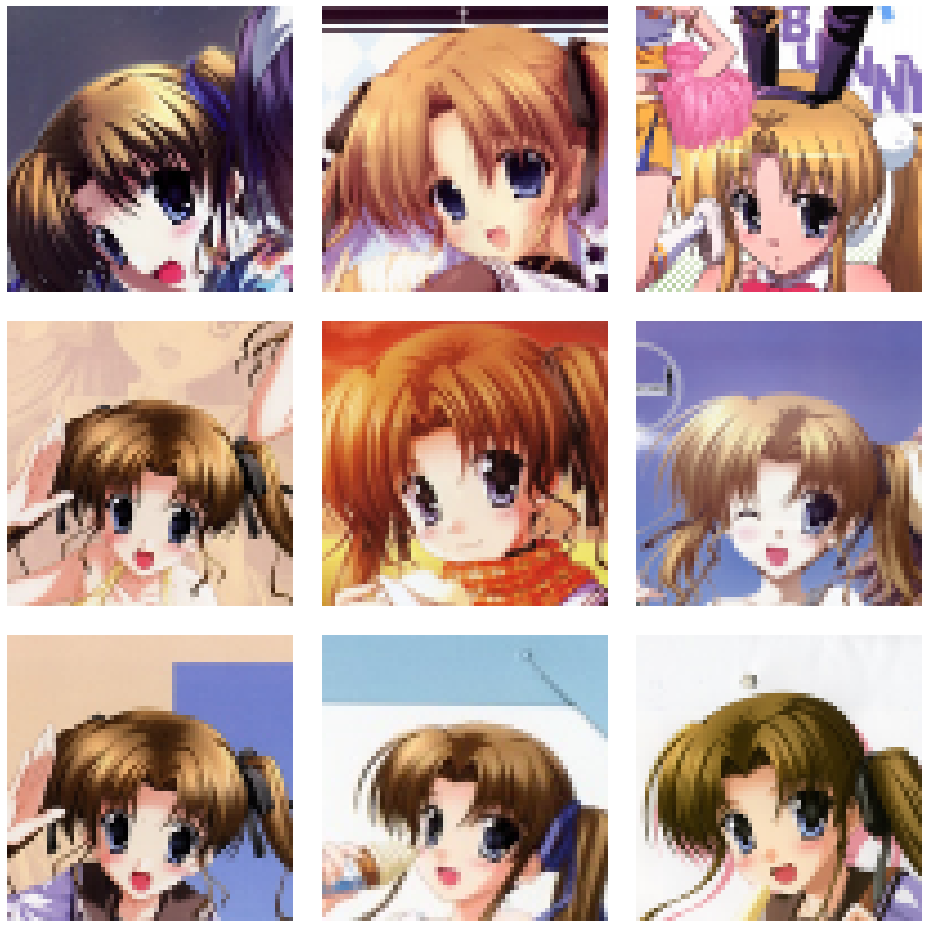

In [ ]:
#ÁîªÂÉè„ÇíÁ¢∫Ë™ç
display_9_images_from_dataset(datasets)

### TFRecord„Å´Â§âÊèõ„ÅóGCS„Å∏„Ç¢„ÉÉ„Éó„É≠„Éº„Éâ

In [ ]:
#ÂÜç„Ç®„É≥„Ç≥„Éº„Éâ
def recompress_image(image):
  image = tf.cast(image, tf.uint8)
  image = tf.image.encode_jpeg(image, optimize_size=True, chroma_downsampling=False)
  return image

datasets_comp = datasets.map(recompress_image, num_parallel_calls=AUTOTUNE)
datasets_comp = datasets_comp.batch(shard_size) # ÂàÜÂâ≤Êï∞„Åî„Å®„Å´„Éê„ÉÉ„ÉÅÂåñ

In [ ]:
#TFRecordÂ§âÊèõ„Ç≥„Éº„Éâ
def _bytestring_feature(list_of_bytestrings):
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=list_of_bytestrings))

def to_tfrecord(img_bytes):  

  feature = {
      "image": _bytestring_feature([img_bytes]) #1ÁîªÂÉè„Çí„É™„Çπ„Éà„Å´ÂÖ•„Çå„Çã
  }

  return tf.train.Example(features=tf.train.Features(feature=feature)) #tf.train.Example„É°„ÉÉ„Çª„Éº„Ç∏„Å´„Åô„ÇãÂøÖË¶Å„ÅÇ„Çä, feature=tf.train.Features(„Ç∑„É™„Ç¢„É©„Ç§„Ç∫„Åï„Çå„Åüfeature„Ç§„É≥„Çπ„Çø„É≥„Çπ)


In [ ]:
#TFRecord„Å∏Â§âÊèõ„Åó„ÄÅËª¢ÈÄÅ„Åô„Çã

print("Writing TFRecords")

for shard, image in enumerate(datasets_comp):
  #„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫„ÇíÂèñÂæó
  shard_size = image.numpy().shape[0]
  #„Éï„Ç°„Ç§„É´Âêç„Çí„Å§„Åë„Çã (BP)
  filename = GCS_OUTPUT + "/{:02d}-{}.tfrec".format(shard, shard_size)

  #TFRecord„Å´Êõ∏„ÅçÂá∫„Åó
  with tf.io.TFRecordWriter(filename) as out_file:
    #‰∏ÄÊûö„Åö„Å§„Ç∑„É™„Ç¢„É©„Ç§„Ç∫
    for i in range(shard_size):
      example = to_tfrecord(
                            image.numpy()[i]
                            )
      #„Ç∑„É™„Ç¢„É©„Ç§„Ç∫Âåñ
      out_file.write(example.SerializeToString()) #Ëª¢ÈÄÅ
    print("Wrote file {} containing {} records".format(filename, shard_size)) #Ëª¢ÈÄÅÁµêÊûú„ÇíË°®Á§∫

Writing TFRecords
Wrote file gs://my-kaglle-getting-started/imoto-face/00-900.tfrec containing 900 records
Wrote file gs://my-kaglle-getting-started/imoto-face/01-900.tfrec containing 900 records
Wrote file gs://my-kaglle-getting-started/imoto-face/02-900.tfrec containing 900 records
Wrote file gs://my-kaglle-getting-started/imoto-face/03-900.tfrec containing 900 records
Wrote file gs://my-kaglle-getting-started/imoto-face/04-900.tfrec containing 900 records
Wrote file gs://my-kaglle-getting-started/imoto-face/05-900.tfrec containing 900 records
Wrote file gs://my-kaglle-getting-started/imoto-face/06-900.tfrec containing 900 records
Wrote file gs://my-kaglle-getting-started/imoto-face/07-900.tfrec containing 900 records
Wrote file gs://my-kaglle-getting-started/imoto-face/08-900.tfrec containing 900 records
Wrote file gs://my-kaglle-getting-started/imoto-face/09-900.tfrec containing 900 records
Wrote file gs://my-kaglle-getting-started/imoto-face/10-900.tfrec containing 900 records
Wro

## ÂâçÂá¶ÁêÜ„ÅåÁµÇ„Çè„Å£„ÅüÂ†¥Âêà„Åì„Åì„Åã„ÇâÂÆüË°å„Åô„Çã

### „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÇíCGS„Åã„Çâ„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ

In [9]:
def read_tfrecord(example):
    #Êàª„ÅôfeatureË¶ÅÁ¥†„ÇíÂÆöÁæ©
    features = {
        "image": tf.io.FixedLenFeature([], tf.string)
    }
    #TFRecord„Çí„Éá„Ç≥„Éº„Éâ
    example = tf.io.parse_single_example(example, features)
      
    #image„Çí„Éá„Ç≥„Éº„Éâ(3channel)
    image = tf.io.decode_jpeg(example['image'], channels=3)
    #ÂΩ¢„ÇíÊï¥„Åà„Çã
    image = tf.reshape(image, [*TARGET_SIZE, 3])

    return image

In [10]:
#È†ÜÁï™„Çí‰∏çÂïè„Å´„Åó„Å¶È´òÈÄüÂåñ
option_no_order = tf.data.Options()
option_no_order.deterministic  = False

#„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ
filenames = tf.io.gfile.glob(GCS_OUTPUT + "/*.tfrec")
datasets = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTOTUNE) #„Éá„Ç≥„Éº„ÉâÁî®ÊßãÈÄ†‰ΩìÂÆöÁæ©
datasets = datasets.with_options(option_no_order) #„Ç™„Éó„Ç∑„Éß„É≥Ë®≠ÂÆö
datasets = datasets.map(read_tfrecord, num_parallel_calls=AUTOTUNE) #TF„Çí„Éá„Ç≥„Éº„Éâ
datasets = datasets.shuffle(300) #„Ç∑„É£„ÉÉ„Éï„É´

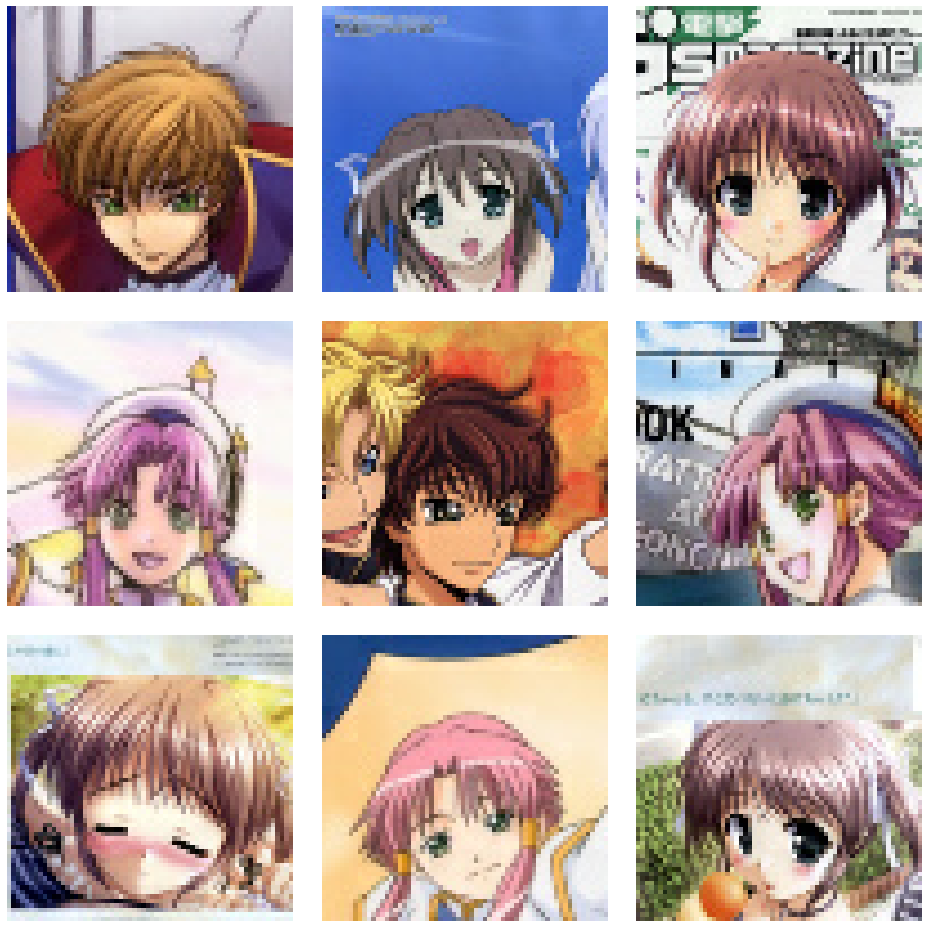

In [11]:
display_9_images_from_dataset(datasets) #Á¢∫Ë™ç

In [12]:
### ÂÜçÂ∫¶JPEG„Åã„ÇâÂ§âÊèõ„Åô„Çã

def preprocess(image):
  image = tf.cast(image, tf.float32)

  # 0 1 „ÅÆÁØÑÂõ≤„ÅßÊ≠£Ë¶èÂåñ„Åô„Çã
  #image /= 255.0

  # -1 1 „ÅÆÁØÑÂõ≤„ÅßÊ≠£Ë¶èÂåñ„Åô„Çã

  # PART6
  # Â≠¶Áøí„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„Åã„Å£„Åü„ÅÆ„Åß -1, 1„ÅÆÁØÑÂõ≤„ÅßÁîªÂÉè„ÇíÊ≠£Ë¶èÂåñ„Åô„Çã

  image =  2 * image / 255 - 1

  return image

In [41]:
#ds„ÇíÂ§âÊèõ
ds = datasets.map(preprocess)

In [42]:
ds = ds.shuffle(buffer_size=nb_images) #„Ç∑„É£„ÉÉ„Éï„É´
ds = ds.repeat() #ÁÑ°ÈôêÂåñ
ds = ds.batch(BATCH_SIZE) #„Éê„ÉÉ„ÉÅ„ÅßÂå∫Âàá„Çã
ds = ds.prefetch(buffer_size=AUTOTUNE) #‰∫ãÂâçÂèñÂæó„ÅßÈ´òÈÄüÂåñ
ds #‰∏ÄÂøúÁ¢∫Ë™ç

<PrefetchDataset element_spec=TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None)>

### „Éô„Éº„Çπ„É©„Ç§„É≥‰ΩúÊàê

In [83]:
#discriminator

def build_discriminator():
  input = layers.Input(shape=(64,64,3)) #64,64,3„Ç´„É©„Éº
  feature = layers.Conv2D(64, (5,5), strides=(2,2), padding="same")(input)
  feature = layers.LeakyReLU()(feature) 
  feature = layers.BatchNormalization()(feature)
  feature = layers.Conv2D(64 * 2, (5,5), strides=(2,2), padding="same")(feature)
  feature = layers.LeakyReLU()(feature)
  feature = layers.BatchNormalization()(feature)
  feature = layers.Conv2D(64 * 2 * 2, (5,5), strides=(2,2), padding="same")(feature)
  feature = layers.LeakyReLU()(feature)
  feature = layers.BatchNormalization()(feature)
  feature = layers.Flatten()(feature)
  output = layers.Dense(1, activation="sigmoid")(feature) #2ÂÄ§„Å™„ÅÆ„Åß

  discriminator = tf.keras.Model(inputs = input , outputs = output)

  return discriminator

discriminator = build_discriminator()
discriminator.summary()

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 64)        4864      
                                                                 
 leaky_re_lu_90 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_90 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_36 (Conv2D)          (None, 16, 16, 128)       204928    
                                                                 
 leaky_re_lu_91 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                          

In [87]:
#Generator
def build_generator():
  latent_dim = 100 #ÊΩúÂú®Ê¨°ÂÖÉ„Åå100
  input = layers.Input(shape = (100,))
  feature = layers.Dense(8*8*256, use_bias=False)(input) #„Éê„Ç§„Ç¢„Çπ„Å™„Åó ÁîªÂÉè„ÇíËÜ®„Çâ„Åæ„Åô
  feature = layers.BatchNormalization()(feature)
  feature = layers.LeakyReLU()(feature)
  feature = layers.Reshape((8,8,256))(feature)

  # PART11
  #Layer„ÇíÂúßÁ∏Æ 
  '''
  feature = layers.Conv2DTranspose(64 * 2 * 2 , (5,5) ,strides=(1,1), padding="same", use_bias=False)(feature) #Á¨¨‰∏ÄÂ±§„ÅØStrides„Åå(1,1)„ÅåBPÔºü
  feature = layers.BatchNormalization()(feature)
  feature = layers.LeakyReLU()(feature)
  '''
  feature = layers.Conv2DTranspose(64 * 2 , (5,5) ,strides=(2,2), padding="same", use_bias=False)(feature)
  feature = layers.BatchNormalization()(feature)
  feature = layers.LeakyReLU()(feature)
  feature = layers.Conv2DTranspose(64 , (5,5) ,strides=(2,2), padding="same", use_bias=False)(feature)
  feature = layers.BatchNormalization()(feature)
  feature = layers.LeakyReLU()(feature)
  #PART9
  #activation„Çítanh„Å´
  feature = layers.Conv2DTranspose(3 , (5,5) ,strides=(2,2), padding="same", use_bias=False, activation="tanh")(feature)

  generator = tf.keras.Model(inputs=input, outputs=feature)

  return generator

generator = build_generator()
generator.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_37 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_32 (Dense)            (None, 16384)             1638400   
                                                                 
 batch_normalization_104 (Ba  (None, 16384)            65536     
 tchNormalization)                                               
                                                                 
 leaky_re_lu_104 (LeakyReLU)  (None, 16384)            0         
                                                                 
 reshape_19 (Reshape)        (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_68 (Conv2D  (None, 16, 16, 128)      819200    
 Transpose)                                               

In [88]:
class GAN(tf.keras.Model): #„ÇØ„É©„Çπ‰ΩúÊàê
  def __init__(self, discriminator, generator, latent_dim):  #„Ç≥„É≥„Çπ„Éà„É©„ÇØ„Çø
    super().__init__() #Á∂ôÊâø
    self.discriminator = discriminator #Ë≠òÂà•Ê©ü 
    self.generator = generator #ÁîüÊàêÂô®
    self.latent_dim = latent_dim # ÊΩúÂú®Ê¨°ÂÖÉ
    #Ë©ï‰æ°Èñ¢Êï∞„ÇíÂÆöÁæ©
    self.d_loss_metric = tf.keras.metrics.Mean(name="d_loss") #Batch„Åô„Åπ„Å¶„ÅÆË©ï‰æ°„Çí„Å®„Çã.ÁµêÊûú„ÅÆÂπ≥Âùá„Çí„Å®„Çã
    self.g_loss_metric = tf.keras.metrics.Mean(name="g_loss") 

  def compile(self, d_optimizer, g_optimizer, loss_fn): #ÊúÄÈÅ©Âåñ„Çí2„Å§‰ΩúÊàê
    super(GAN,self).compile() #Á∂ôÊâø
    self.d_optimizer = d_optimizer #discriminatorÁî®„ÅÆOptimizer
    self.g_optimizer = g_optimizer #GeneratorÁî®„ÅÆOptimizer
    self.loss_fn = loss_fn

  @property
  def matrics(self):
    return [self.d_loss_metric, self.g_loss_metric] #Ë©ï‰æ°Èñ¢Êï∞„ÇíË®≠ÂÆö

  def train_step(self, real_images): #train„ÅÆoverride
    batch_size = tf.shape(real_images)[0]  # (batch, height, width, channel) „Éê„ÉÉ„ÉÅÊï∞„ÇíÂçäÂàÜÁ¢∫‰øù
    random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim)) #„Éê„ÉÉ„ÉÅÊï∞ÂàÜÊΩúÂú®Á©∫Èñì„Åã„ÇâÁîªÂÉè„ÅÆÁ®Æ„Çí‰ΩúÊàê
    genereated_image = self.generator(random_latent_vectors) #ÁîªÂÉè„ÇíÁîüÊàê
    combined_image = tf.concat([real_images, genereated_image], axis=0) #Á∏¶„Å´ÁµêÂêà
    #ÁúüÁîªÂÉè : 1,  ÂÅΩÁîªÂÉè : 0
    combined_label = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0) #„É©„Éô„É´„Çí‰ΩúÊàê
    
    combined_label += 0.1 *tf.random.uniform(tf.shape(combined_label)) #„É©„Éô„É´„Å´„Éé„Ç§„Ç∫„ÇíÂÖ•„Çå„Çã
    
    #Â≠¶Áøí„ÇíË°å„ÅÜ
    with tf.GradientTape() as tape:
      predictions = self.discriminator(combined_image) #‰∫àÊ∏¨
      #d_loss = self.loss_fn(combined_label, predictions) #ÊêçÂ§±„ÇíÂèñÂæó

      #PART3
      #TPU„ÅÆ„Åü„ÇÅ„Å´ÊêçÂ§±„Çí„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫ÂàÜÂâ≤„Çã
      d_loss = tf.reduce_sum(self.loss_fn(combined_label, predictions)) * (1. / 128) 


    grads = tape.gradient(d_loss, self.discriminator.trainable_weights) #ÊêçÂ§±„Åã„Çâ„Ç¶„Çß„Ç§„Éà„ÇíÂèñÂæó
    self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights)) #„Ç¶„Çß„Ç§„ÉàË™øÊï¥

    #generator
    random_latent_vector = tf.random.normal(shape=(batch_size, self.latent_dim))
    misleading_label = tf.ones((batch_size, 1)) #Áúü„ÅÆÂÄ§„Åß„É©„Éô„É´„Çí‰ªò„Åë„Çã
    with tf.GradientTape() as tape:
      predictions = self.discriminator(self.generator(random_latent_vector)) #ÂÅΩÁîªÂÉè„Çí‰∫àÊ∏¨
      #g_loss = self.loss_fn(misleading_label, predictions) #ÊêçÂ§±„Å´ÂÖ•„Çå„Çã
      g_loss = tf.reduce_sum(self.loss_fn(misleading_label, predictions)) * (1. / 128)
    grads = tape.gradient(g_loss, self.generator.trainable_weights)
    self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

    self.d_loss_metric.update_state(d_loss) #ÊêçÂ§±„Åã„ÇâË©ï‰æ°„Åô„Çã
    self.g_loss_metric.update_state(g_loss) #ÊêçÂ§±„Åã„ÇâË©ï‰æ°„Åô„Çã
    return {"d_loss" : self.d_loss_metric.result(), "g_loss" : self.g_loss_metric.result()}


### Google Colab „ÅÆ„É™„Éº„Ç∏„Éß„É≥Á¢∫Ë™ç

GCS„ÅÆÁÑ°ÊñôÊû†„ÅÆ„Åü„ÇÅ„Å´Á¢∫Ë™ç

In [17]:
#gping„Ç§„É≥„Çπ„Éà„Éº„É´
! curl https://storage.googleapis.com/gcping-release/gcping_linux_amd64_latest > gcping && chmod +x gcping

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6375k  100 6375k    0     0  30.3M      0 --:--:-- --:--:-- --:--:-- 30.3M


In [18]:
#‰ΩépingÂÄ§„ÅÆÂ†¥ÊâÄ„ÅåTPU„Çµ„Éº„Éê„Éº„ÅΩ„ÅÑ
! /content/gcping

 1.  [us-central1]              7.094542ms
 2.  [global]                   11.092202ms
 3.  [us-south1]                22.153587ms
 4.  [us-east5]                 25.351259ms
 5.  [northamerica-northeast2]  27.747973ms
 6.  [us-west3]                 28.817933ms
 7.  [us-east4]                 31.238873ms
 8.  [northamerica-northeast1]  34.368975ms
 9.  [us-east1]                 38.819399ms
10.  [us-west1]                 45.34193ms
11.  [us-west4]                 49.476095ms
12.  [us-west2]                 53.414206ms
13.  [europe-west2]             100.313565ms
14.  [europe-west9]             107.985023ms
15.  [europe-west4]             108.62079ms
16.  [europe-west1]             111.177332ms
17.  [europe-west3]             116.348286ms
18.  [europe-west6]             122.72924ms
19.  [europe-west8]             124.946289ms
20.  [europe-southwest1]        125.499616ms
21.  [europe-central2]          131.156965ms
22.  [europe-north1]            133.834618ms
23.  [southamerica-east1] 

### „ÉÜ„Çπ„ÉàÁî®„Ç≥„Éº„Éâ

In [56]:
#ÁîªÂÉè‰øùÂ≠ò„ÉÜ„Çπ„Éà
random_latent_vector = tf.random.normal(shape=(3, 100)) #ÁîªÂÉè„Ç∑„Éº„Éâ‰ΩúÊàê
generated_imgs = generator(random_latent_vector)
#generated_imgs *= 255 #ÁîªÂÉè„ÇíÂæ©ÂÖÉ
generated_imgs = (generated_imgs + 1) * 255 / 2
generated_imgs = generated_imgs.numpy() #np„Å´Â§âÊèõ
generated_img = generated_imgs[0]
pil_img = tf.keras.utils.array_to_img(generated_img)
hoge = "/content/drive/MyDrive/data/imouto_face/GAN_result" + f"/{time.time()}.jpeg"
pil_img.save(hoge)

### „Ç≥„Éº„É´„Éê„ÉÉ„ÇØ

In [89]:
class GanMonitor(tf.keras.callbacks.Callback): #„Ç≥„Éº„É´„Éê„ÉÉ„ÇØ‰ΩúÊàê
  def __init__(self, log_dir, num_img = 1, latent_dim = 100):
    self.num_img = num_img #ÁîªÂÉè„ÅÆÁîüÊàêÊï∞
    self.latent_dim = latent_dim #ÊΩúÂú®Ê¨°ÂÖÉ
    self.log_dir = log_dir
  def on_epoch_end(self, epoch, logs=None): #„Ç®„Éù„ÉÉ„ÇØ„ÅÆÂæå„Å´Âãï„ÅèÁîªÂÉè
    random_latent_vector = tf.random.normal(shape=(self.num_img, self.latent_dim )) #ÁîªÂÉè„Ç∑„Éº„Éâ‰ΩúÊàê
    generated_imgs = self.model.generator(random_latent_vector)
    generated_imgs = (generated_imgs + 1) * 255 / 2
    generated_imgs = generated_imgs.numpy() #np„Å´Â§âÊèõ
    for idx, generated_img in enumerate(generated_imgs):
      pil_img = tf.keras.utils.array_to_img(generated_img)
      output_path = self.log_dir + f"/{time.time()}_{idx+1}.jpeg" 
      pil_img.save(output_path)

In [98]:
#TPU„Åß„ÅØtensorboard„Çí„ÅÜ„Åæ„Åè‰Ωø„Åà„Å™„ÅÑ„ÅÆ„ÅßhistoryÂûã„ÅßÂ±•Ê≠¥„ÇíÊÆã„Åô

#Â±•Ê≠¥Áî®„ÅÆhistory
history = History() 

In [99]:
callbacks = [GanMonitor("/content/drive/MyDrive/data/imouto_face/GAN_result/PART11"), history] #„Ç≥„Éº„É´„Éê„ÉÉ„ÇØ„ÇíÂÆ£Ë®Ä

In [91]:
#TPU„ÅÆ„Çπ„Ç≥„Éº„Éó„Åß„É¢„Éá„É´„Çí‰ΩúÊàê
with strategy.scope():
  
  generator = build_generator() #„Ç∏„Çß„Éç„É¨„Éº„Çø
  discriminator = build_discriminator() #„Éá„Ç£„Çπ„ÇØ„É™„Éü„Éç„Éº„Çø
  model = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim) #„É¢„Éá„É´‰ΩúÊàê 

  #PART2
  #Reduction„ÇíNone„Å´

  #PART9
  #Adam„ÅÆ„É¨„Éº„Éà„Çí0.5„Å´
  
  model.compile(loss_fn=tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE), 
              d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1 = 0.5), 
              g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1 = 0.5))  

TPU„Åß„ÅØÁîªÂÉè„ÇíWorker„ÅßÂàÜÂâ≤„Åó„Åù„ÅÆÁµêÊûú„ÇíÂêàË®à„Åô„Çã„Åì„Å®„Åßloss„ÇíÁÆóÂá∫„Åô„Çã.

TPU„ÅÆÂ†¥Âêà„ÅØReduction„ÇíNONE or SUM„ÇíÈÅ∏„Åπ„Çã„ÄÇ Ê≠£„Åó„ÅèË®àÁÆó„Åô„Çã„Åü„ÇÅ„Å´„ÅØ‰Ωï„ÇÇË°å„Çè„Å™„ÅÑNONE„ÇíÈÅ∏Êäû„Åó„É¢„Éá„É´Èñ¢Êï∞ÂÜÖ„Åßloss„ÇíBATCH_SIZE„ÅßÂâ≤„Çã

https://www.tensorflow.org/tutorials/distribute/custom_training

In [103]:
#Â≠¶Áøí

#PART11
#EPCOH„ÇíÂ¢ó„ÇÑ„Åô

epochs = 800
steps_per_epoch = nb_images // BATCH_SIZE #ÁîªÂÉè‰∏ÄÂë®ÂàÜ
model.fit(ds, epochs=epochs,  steps_per_epoch=steps_per_epoch, callbacks=callbacks)

Epoch 1/800
  5/112 [>.............................] - ETA: 3s - d_loss: -2.1581 - g_loss: 0.0052WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0056s vs `on_train_batch_end` time: 0.2461s). Check your callbacks.


112/112 [==============================] - 6s 37ms/step - d_loss: -1.9908 - g_loss: 0.1177
Epoch 2/800
112/112 [==============================] - 4s 36ms/step - d_loss: -2.1584 - g_loss: 0.0617
Epoch 3/800
112/112 [==============================] - 4s 32ms/step - d_loss: -2.0394 - g_loss: 0.2060
Epoch 4/800
112/112 [==============================] - 4s 32ms/step - d_loss: -2.0630 - g_loss: 0.0951
Epoch 5/800
112/112 [==============================] - 4s 32ms/step - d_loss: -0.8709 - g_loss: 0.9034
Epoch 6/800
112/112 [==============================] - 3s 31ms/step - d_loss: 3.5446 - g_loss: 2.2764
Epoch 7/800
112/112 [==============================] - 4s 32ms/step - d_loss: -2.0577 - g_loss: 0.0612
Epoch 8/800
112/112 [==============================] - 4s 32ms/step - d_loss: -2.1222 - g_loss: 0.0381
Epoch 9/800
112/112 [==============================] - 4s 33ms/step - d_loss: -2.4617 - g_loss: 0.0340
Epoch 10/800
112/112 [==============================] - 4s 32ms/step - d_loss: -2.4992

EPOCH„Çí800„Å´„Åó„ÅüÁµêÊûúd_loss„ÅÆÂÄ§„Åå„Å®„Çì„Åß„ÇÇ„Å™„ÅÑÊï∞ÂÄ§„Å´„Å™„Å£„Åü„ÄÇ„Ç≥„Éº„Éâ„Çí„Åø„Å¶„ÇÇ„Éû„Ç§„Éä„Çπ„Å´„Å™„ÇãË¶ÅÂõ†„Åå„Çè„Åã„Çâ„Å™„ÅÑ„ÄÇ

### PART11

Â±§„ÇíÂ§âÈ†Ö ‰∏≠ÈñìÂ±§„ÅÆtranspose„Çí‰∏Ä„Å§Ê∂à„Åô 

EPOCH„ÅÆÊï∞„ÇíÂ¢ó„ÇÑ„Åô

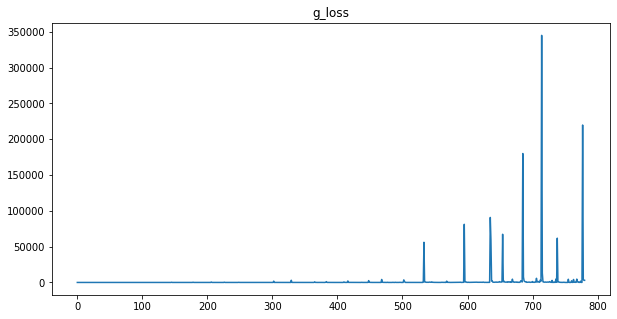

In [104]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = range(len(history.history["g_loss"][20:])), y = history.history["g_loss"][20:], ax=ax)
plt.title("g_loss")
plt.show()

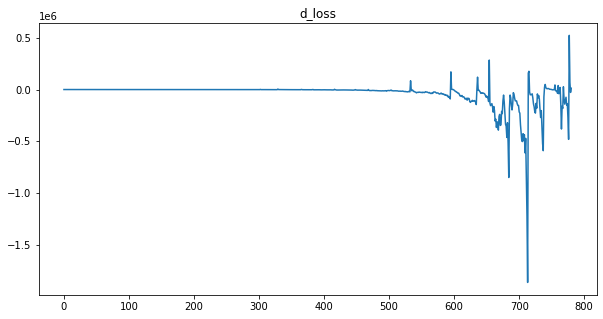

In [105]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = range(len(history.history["d_loss"][20:])), y = history.history["d_loss"][20:], ax=ax)
plt.title("d_loss")
plt.show()

d_loss„Åå„Éû„Ç§„Éä„Çπ„Å´ËêΩ„Å°„Å¶„ÅÑ„ÅèÔºüÔºüÔºü
g_loss„ÅåË∑≥„Å≠‰∏ä„Åå„Çã

ÊêçÂ§±Èñ¢Êï∞ or Ë©ï‰æ°Èñ¢Êï∞„Åå‰Ωï„Åã„Åå„Åä„Åã„Åó„ÅÑ

ÁîüÊàêÁîªÂÉè

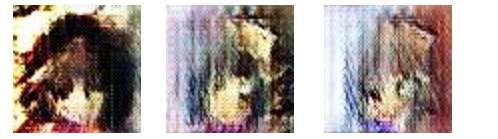

### PART10

Adam„ÅÆbeta„Çí0.5„Å´Â§âÊõ¥
discriminator„ÅÆlr = 0.002„Å´Êàª„Åô


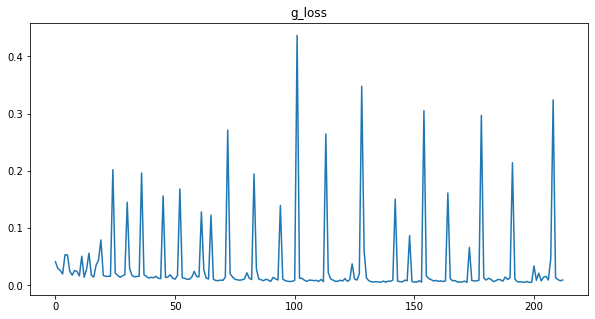

In [70]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = range(len(history.history["g_loss"][20:])), y = history.history["g_loss"][20:], ax=ax)
plt.title("g_loss")
plt.show()

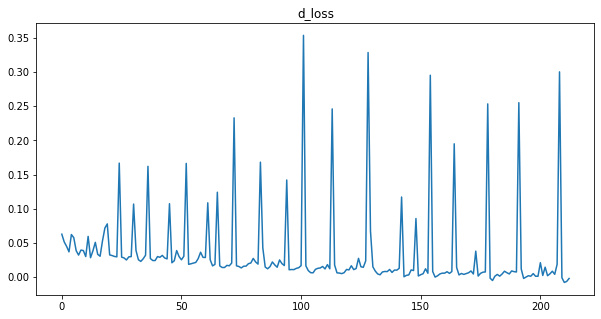

In [71]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = range(len(history.history["d_loss"][20:])), y = history.history["d_loss"][20:], ax=ax)
plt.title("d_loss")
plt.show()

ÁîüÊàêÁîªÂÉè

„Éé„Ç§„Ç∫„ÅåÊ∏õ„Å£„Åü

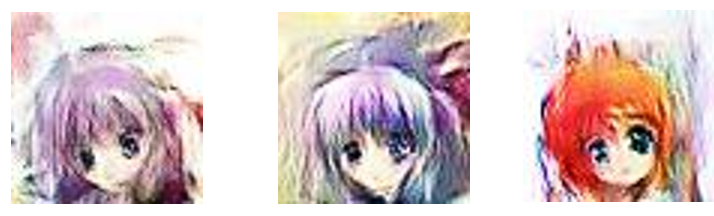

### PART9
Adam„ÅÆbeta„Çí0.5„Å´Â§âÊõ¥

disc„ÅÆlr =0.0003

d_loss„Åå‰∏ä„Åå„Çâ„Å™„ÅÑ <= disciminator„ÅÆActiation„Çítanh„Å´ÈñìÈÅï„Åà„Å¶„ÅÑ„Åü

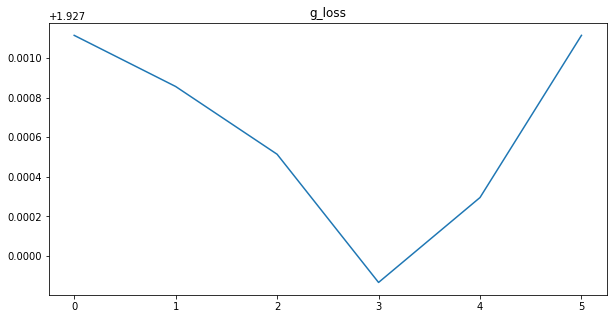

In [48]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = range(len(history.history["g_loss"][20:])), y = history.history["g_loss"][20:], ax=ax)
plt.title("g_loss")
plt.show()

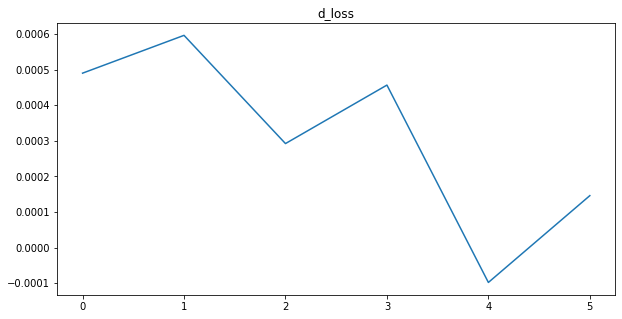

In [49]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = range(len(history.history["d_loss"][20:])), y = history.history["d_loss"][20:], ax=ax)
plt.title("d_loss")
plt.show()

ÁîüÊàêÁîªÂÉè

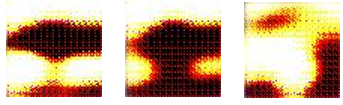

### PART8 

discriminator„ÅÆlr„Çí0.0003„Å´Â§âÊõ¥

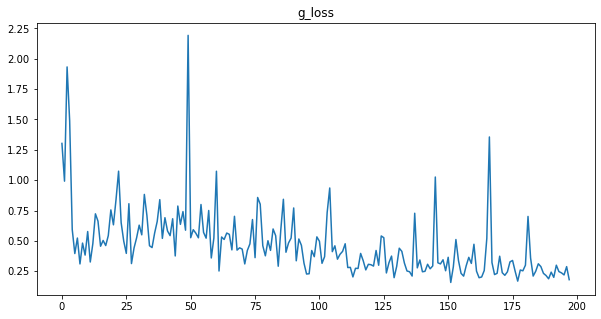

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = range(len(history.history["g_loss"][20:])), y = history.history["g_loss"][20:], ax=ax)
plt.title("g_loss")
plt.show()

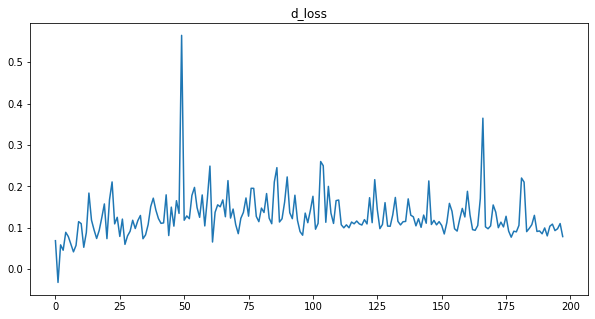

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = range(len(history.history["d_loss"][20:])), y = history.history["d_loss"][20:], ax=ax)
plt.title("d_loss")
plt.show()

‰ª•Ââç„ÅÆÁµêÊûú„Å®Â§â„Çè„Çâ„Å™„ÅÑ

ÁîüÊàêÁîªÂÉè

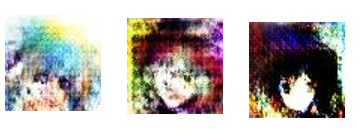

### PART7

generator = 0.0003 „Å´Â§âÊõ¥

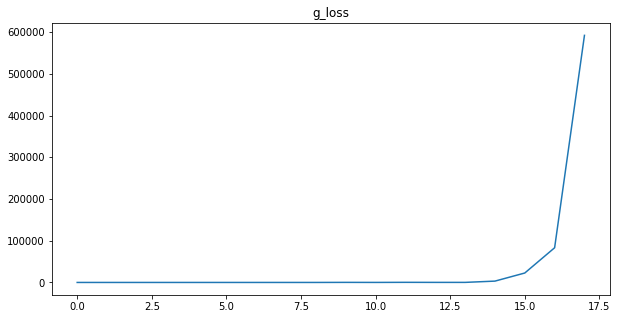

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = range(len(history.history["g_loss"])), y = history.history["g_loss"], ax=ax)
plt.title("g_loss")
plt.show()

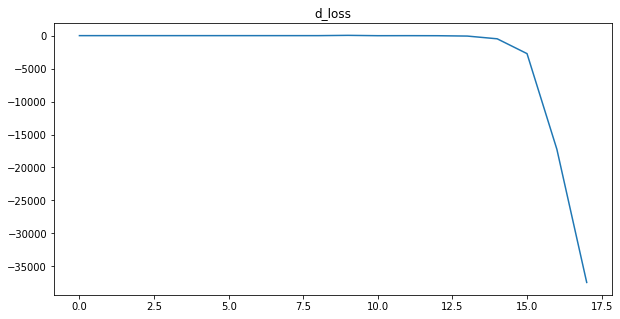

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = range(len(history.history["d_loss"])), y = history.history["d_loss"], ax=ax)
plt.title("d_loss")
plt.show()

„É¢„Éá„É´„ÅåÂ¥©Â£ä„Åó„Åü„ÅÆ„ÅßÁµÇ‰∫Ü

ÁîüÊàêÁîªÂÉè

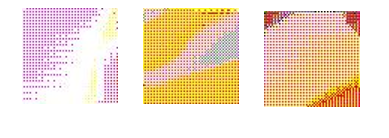

### PART6

ÁîªÂÉè„Çí (-1, 1) „Å´Ê≠£Ë¶èÂåñ
tanh„Å´Â§âÊõ¥

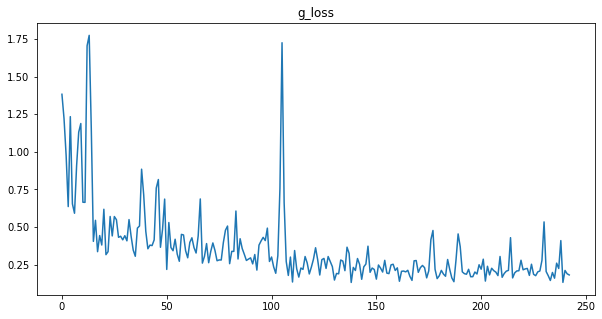

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = range(len(history.history["g_loss"])), y = history.history["g_loss"], ax=ax)
plt.title("g_loss")
plt.show()

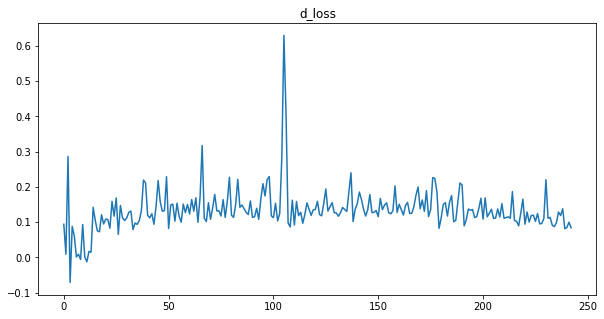

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = range(len(history.history["d_loss"])), y = history.history["d_loss"], ax=ax)
plt.title("d_loss")
plt.show()

d_loss„ÅÆÂùáË°°„Åå‰Ωé„Åô„Åé„Çã„ÅÆ„Åß‰ΩéÂìÅË≥™„ÅÆÁîªÂÉè„Å∞„Åã„ÇäÁîüÊàê„Åï„Çå„Çã

ÁîüÊàêÁîªÂÉè

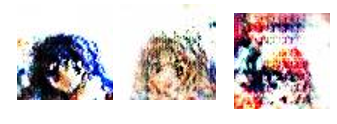

### PART5

„Éé„Ç§„Ç∫„ÇíÂä†„Åà„Åü

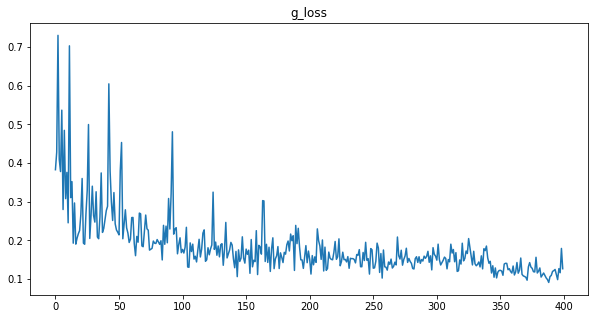

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = range(len(history.history["g_loss"])), y = history.history["g_loss"], ax=ax)
plt.title("g_loss")
plt.show()

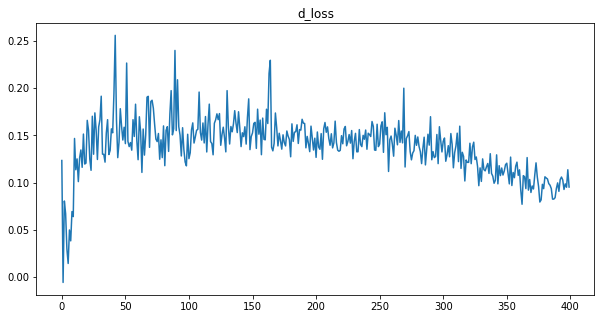

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = range(len(history.history["d_loss"])), y = history.history["d_loss"], ax=ax)
plt.title("d_loss")
plt.show()

d_loss„ÅÆÂùáË°°„ÅåÊÉú„Åó„ÅÑ

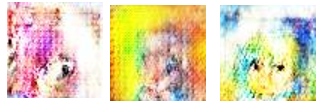

### Part4

„Éá„Ç£„Çπ„ÇØ„É™„Éü„Éç„Éº„Çø„Çí2„Å§‰ªò„Åë„Åü

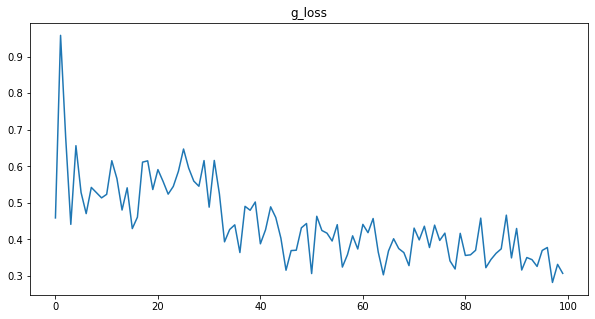

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = range(len(history["g_loss"][100:])), y = history["g_loss"][100:], ax=ax)
plt.title("g_loss")
plt.show()

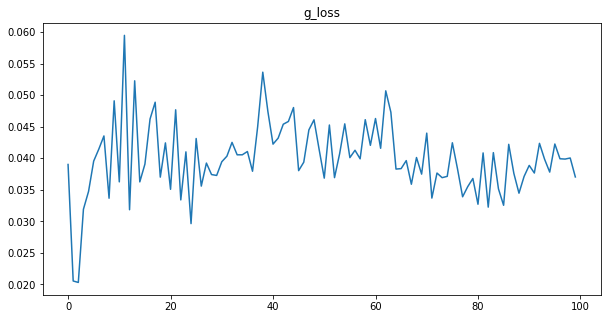

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = range(len(history["d_loss"][100:])), y = history["d_loss"][100:], ax=ax)
plt.title("g_loss")
plt.show()

discriminator„ÅåÂº∑„Åô„Åé„Çã

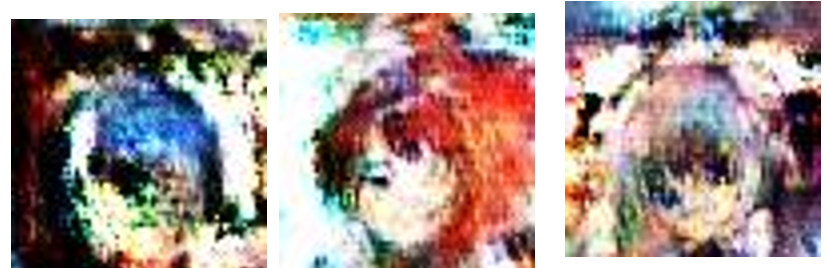

### Part3

ReductionLoss„Çí‰øÆÊ≠£

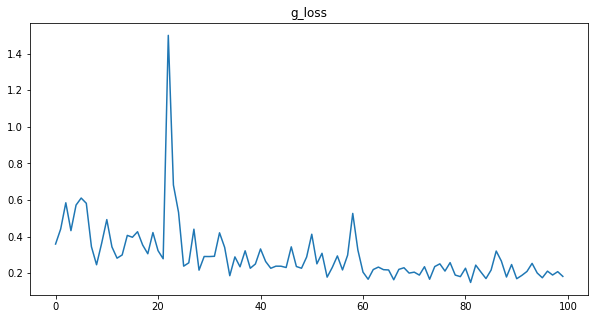

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = range(len(history.history["g_loss"])), y = history.history["g_loss"], ax=ax)
plt.title("g_loss")
plt.show()

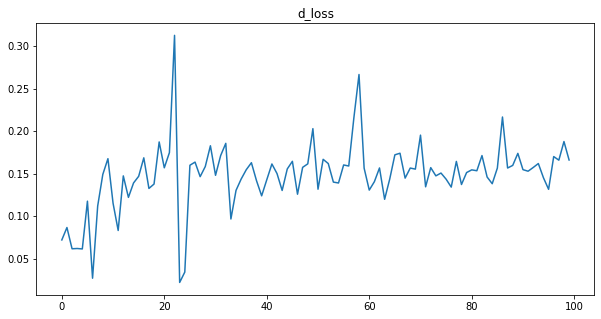

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = range(len(history.history["d_loss"])), y = history.history["d_loss"], ax=ax)
plt.title("d_loss")
plt.show()

„Åì„Çå„ÅÆd_loss„Çí0.5„Å´„Åô„Çå„Å∞„Çà„ÅÑ -> d_loss„ÇíÂ∞ë„ÅóÂº±„Åè„Åô„Çã

Âá∫ÂäõÁµêÊûú

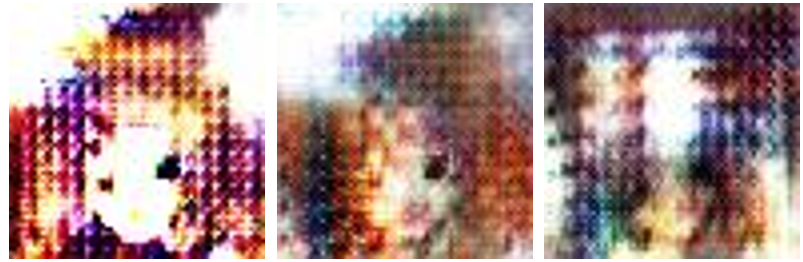

### ËÄÉÂØü

d_loss, g_lossÊõ≤Á∑ö„Åå„Åä„Åã„Åó„ÅÑ„ÅÆ„Åß‰Ωï„Åã„Çí‰øÆÊ≠£„Åó„Å™„ÅÑ„Å®„ÅÑ„Åë„Å™„ÅÑ
- d_loss„ÅØ0.5„ÅÇ„Åü„Çä„ÅßÂùáË°°„Åå„Å®„Çå„Çã„Å®Ê≠£„Åó„ÅèÂ≠¶Áøí„Åß„Åç„Çã„Å®Âà§ÂÆö„Åß„Åç„Çã
- g_loss„ÅåÂ§ß„Åç„Åè„Å™„Çä„Åô„Åé„Çã„Å®„Å†„Åæ„Åõ„Å¶„ÅÑ„Å™„ÅÑ

**PART3**

1. Reduction„ÅÆË®≠ÂÆö„ÇíÈñìÈÅï„Åà„Å¶„ÅÑ„Çã (NONE„Å´„Åó„Å¶GLOBAL_BATCHSIZE„ÅßÂàÜÂâ≤)
-  TPU‰ΩøÁî®ÊôÇ„Éê„ÉÉ„ÉÅ„ÅØ„ÉØ„Éº„Ç´„Åî„Å®„Å´ÂàÜÂâ≤„Åï„Çå„Å¶Â≠¶Áøí„Åï„Çå„Çã„ÄÇÊêçÂ§±„ÅØÂêàË®àÂÄ§„ÅåËøî„Å£„Å¶„Åè„Çã
- SUMÊôÇ„ÅØ„ÉØ„Éº„Ç´„ÅßÂàÜÊï£„Åï„Çå„Åü„Éê„ÉÉ„ÉÅÊï∞„ÅßÂâ≤„Çâ„Çå„ÅüÊêçÂ§±„ÅåËøî„Å£„Å¶„Åè„Çã„Åå„ÄÅNONE„Å´„Åô„Çã„Åì„Å®„Å´„Çà„ÇäTPU„ÅßÂàÜÂâ≤„Åï„Çå„Åü„Éê„ÉÉ„ÉÅ„ÅåËøî„Å£„Å¶„Åì„Å™„Åè„Å™„Çã
- Ê≠£„Åó„ÅÑGLOBAL_BATCHSIZE(128)„ÅßÂàÜÂâ≤„Åó„ÄÅ„ÉØ„Éº„Ç´„Éº„Åî„Å®„ÅÆÊêçÂ§±„ÇíÊ≠£„Åó„ÅèÂêåÊúü„Åï„Åõ„Çã

- https://www.tensorflow.org/tutorials/distribute/custom_training


„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫„ÅåÂ∞è„Åï„Åô„Åé„ÇãÔºü
- „Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫ÂàÜÁîªÂÉè„ÇíÁîüÊàê„Åó„Å¶„ÅÑ„Çã„Åã„Çâ„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫„ÇíÂ§ß„Åç„Åè„Åó„Å¶„ÇÇÊÑèÂë≥„Åå„Å™„ÅÑ


**PART4**

„Éá„Ç£„Çπ„ÇØ„É™„Éü„Éç„Éº„Çø„ÅåÂº±„Åô„Åé„ÇãÔºü
- ËÄÉÂØüÈñìÈÅï„ÅÑ

„Éá„Ç£„Çπ„ÇØ„É™„Éü„Éç„Éº„Çø„ÅåÂ∞ë„ÅóÂº∑„ÅÑ

- g_loss„ÅØ‰∏ã„Åå„Å£„Å¶„ÅÑ„Å£„Å¶„Çà„ÅÑ(„É©„Éô„É´„Çí‰ªò„Åë„Å¶„ÅÑ„Çã„ÅÆ„Åß)

**PART5**

„Éé„Ç§„Ç∫„ÇíÂä†„Åà„Çã

**PART6**

ÂÖ•ÂäõÁîªÂÉè„Çí-1, 1 Ê¥ªÊÄßÂåñÈñ¢Êï∞„Çítanh„Å´

ÂçòÁ¥î„Å´EpochÊï∞„ÅåÂ∞ë„Å™„Åô„Åé„ÇãÔºü
- 200„Å´Â§âÊõ¥

**PART7**

generator„ÅÆlearning_late„ÇíÂ§âÊõ¥„Åô„Çã

Â¥©Â£ä„Åó„Åü„ÄÇ

**PART8**

discriminator„ÅÆlearning_rate„ÇíÂ§âÊõ¥„Åô„Çã

ÂìÅË≥™„Å´„ÅØÂΩ±Èüø„Å™„ÅÑ

**PART10**

Adam„ÅÆÁ¨¨‰∏Ä„É¢„Éº„É°„É≥„Éà„Çí0.5„Å´Â§âÊõ¥

ÂìÅË≥™„Å´ËâØ„ÅÑÂΩ±Èüø„ÅÇ„Çä

**PART11**

1. Â±§„ÇíÂ§âÊõ¥„Åô„Çã„ÄÇ
2. Epoch„ÅÆÊï∞„ÇíÂ¢ó„ÇÑ„Åô

1. ÂìÅË≥™„Å´„ÅØÂäπÊûú„Å™„Åó
2. loss„Åå„Éû„Ç§„Éä„Çπ„ÇíË∂Ö„Åà„Å¶‰∏ãÈôç„Åó„Å¶„ÅÑ„Åè„ÄÇ <- „É¢„Éá„É´„Åå„Åù„ÇÇ„Åù„ÇÇÈñìÈÅï„Å£„Å¶„ÇãÔºü ü§Æ

ÂèÇËÄÉÊñáÁåÆ

https://qiita.com/underfitting/items/a0cbb035568dea33b2d7

### ÁµêË´ñ

Ë©¶Ë°åÈåØË™§„ÇíË°å„Å£„Åü„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑÁµêÊûú„Å´„Å™„Å£„Åü„ÄÇ

ÂïèÈ°åÁÇπ„ÅØgenerator„ÅÆÊÄßËÉΩ„Åå‰Ωé„Åèdiscrimnator„ÅÆÊãÆÊäó„É©„Ç§„É≥„Åå‰Ωé„Åô„Åé„ÇãÁÇπ„Å´„ÅÇ„Çã„Å®ËÄÉ„Åà„Çâ„Çå„Çã„Åå„ÄÅGenrator„ÅÆÊÄßËÉΩ„Çí‰∏ä„Åí„ÇãÊâãÊÆµ„Åå‰∏çÊòé„Åß„ÅÇ„Çã„ÄÇ

Áü•Ë¶ã
1. GAN„ÅØEpochÂõûÊï∞„ÇíÂ§ö„ÅèÂøÖË¶Å„Å®„Åô„Çã„ÄÇ200~„ÅÇ„Åü„Çä„Åã„Çâ„Åæ„Å®„ÇÇ„Å™ÁîüÊàêÁµêÊûú„Å´„Å™„Çã